In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import util

In [39]:
folder_path = 'datasets/kaggle_clement/'
train_file = 'train.csv'
test_file = 'test.csv'
save_file = 'test_pred.csv'
train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

In [42]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

Accuracy of Logistic Regression Classifier: 93.82%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3505
           1       0.95      0.92      0.93      3230

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735



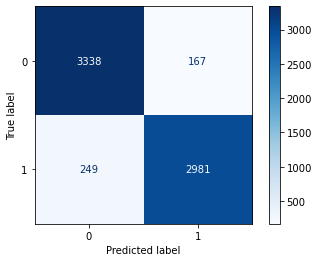

In [48]:
disp = plot_confusion_matrix(model, test_X, test_Y,cmap=plt.cm.Blues)

In [57]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, pred_Y) * 100, 2)) + "%")

Model Accuracy: 93.82%


In [53]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3505
           1       0.95      0.92      0.93      3230

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735

